In [1]:
%pylab inline
import vessel_scoring.models
import vessel_scoring.add_measures
from numpy.lib.recfunctions import *

model = vessel_scoring.models.train_models()[0][1]


Populating the interactive namespace from numpy and matplotlib
Warning, insufficient items to sample, returning all
Warning, inufficient items to sample, returning 3168


addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasures: 6000
addmeasures: 7000
addmeasures: 8000
addmeasures: 9000
addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasures: 6000
addmeasures: 7000
addmeasures: 8000
addmeasures: 9000
addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasures: 6000
addmeasures: 7000
addmeasures: 8000
addmeasures: 9000
addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasures: 6000
addmeasures: 7000
addmeasures: 8000
addmeasures: 9000
addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasures: 6000
addmeasures: 7000
addmeasures: 8000
addmeasures: 9000
addmeasures: 0
addmeasures: 1000
addmeasures: 2000
addmeasures: 3000
addmeasures: 4000
addmeasures: 5000
addmeasure

(array([  2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   1.60000000e+01,   1.05800000e+03,
          7.95200000e+03]),
 array([ 0.04891543,  0.14402389,  0.23913235,  0.3342408 ,  0.42934926,
         0.52445772,  0.61956617,  0.71467463,  0.80978309,  0.90489154,  1.        ]),
 <a list of 10 Patch objects>)

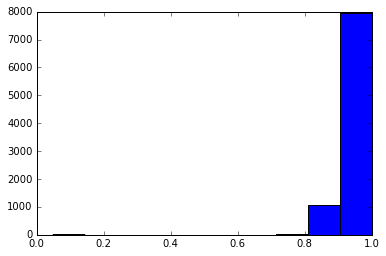

In [4]:
x = numpy.load("datasets/slow-transits.npz")['x']
x = x[isnan(x['speed']) == False]
x = x[isnan(x['course']) == False]
#x['mmsi'] = 0
# x = x[lexsort((x['timestamp'], x['mmsi']))]
x = vessel_scoring.add_measures.add_measures(x)
for name in x.dtype.names:
    if 'stddev' in name and "_log" not in name:
        x = append_fields(x, name + "_log", [], dtypes='<f8', fill_value=0.0)
        x[name + "_log"] = log10(x[name] + 0.000001)
score = model.predict_proba(x)[:,1]
plt.hist(score)